In [1]:
import pandas as pd # for data manipulation
import numpy as np
from matplotlib import offsetbox
# Visualization
import plotly.express as px # for data visualization
import matplotlib.pyplot as plt # for showing handwritten digits

# Skleran
from sklearn import random_projection # for random_projection
from sklearn.preprocessing import MinMaxScaler # for scale
from sklearn.datasets import load_digits # for MNIST data
from sklearn.manifold import Isomap,MDS # for Isomap MDS
from sklearn.decomposition import PCA # for PCA

In [2]:
# Load digits data 
digits = load_digits(n_class=5)

# Some stats
print('Shape of digit images: ', digits.images.shape)
"該數據集由 1797 張 8x8 圖像組成。手寫數字辨識是利用 8x8的影像資。而其中一種特徵的取用方法是例用這64個像素的灰階值來當成特徵。"

Shape of digit images:  (901, 8, 8)


'該數據集由 1797 張 8x8 圖像組成。手寫數字辨識是利用 8x8的影像資。而其中一種特徵的取用方法是例用這64個像素的灰階值來當成特徵。'

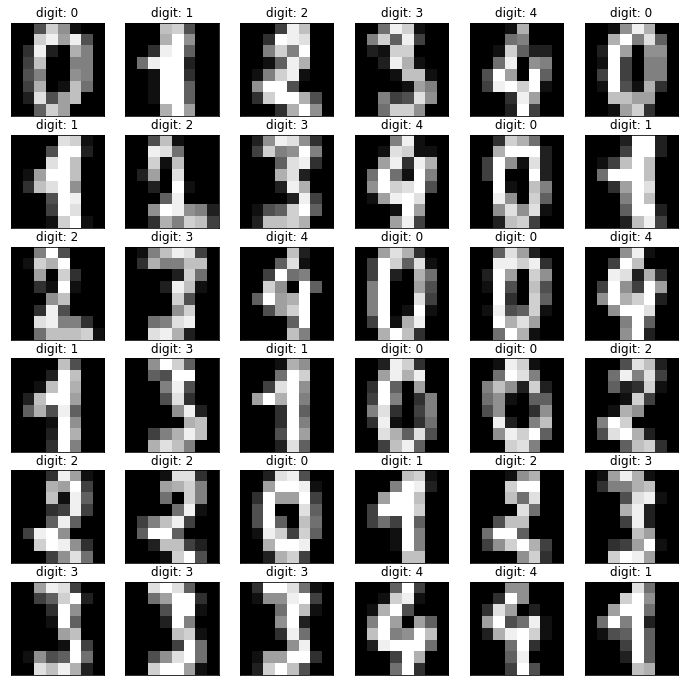

In [4]:
# Display images
plt.rcParams["figure.figsize"] = (12,12)
plt.gray() 
for i in range(36):
    axs=plt.subplot(6, 6, i + 1)
    label = digits.target[i]
    plt.imshow(digits.images[i], cmap=plt.cm.gray, vmax=16, interpolation='nearest')
    ax=axs
    ax.set_title("digit: %i" % label)
    plt.xticks(())
    plt.yticks(())
plt.savefig('C:/Users/riven/iCloudDrive/midproject/img/digits.png', bbox_inches='tight')

In [5]:
### Step 1 - Configure the Isomap function, note we use default hyperparameter values in this example
isomap = Isomap(
    n_neighbors=10, # default=5, algorithm finds local structures based on the nearest neighbors
    n_components=2, # number of dimensions
    eigen_solver='auto', # {‘auto’, ‘arpack’, ‘dense’}, default=’auto’
    tol=0, # default=0, Convergence tolerance passed to arpack or lobpcg. not used if eigen_solver == ‘dense’.
    max_iter=None, # default=None, Maximum number of iterations for the arpack solver. not used if eigen_solver == ‘dense’.
    path_method='auto', # {‘auto’, ‘FW’, ‘D’}, default=’auto’, Method to use in finding shortest path.
    neighbors_algorithm='auto', # neighbors_algorithm{‘auto’, ‘brute’, ‘kd_tree’, ‘ball_tree’}, default=’auto’
    n_jobs=-1, # n_jobsint or None, default=None, The number of parallel jobs to run. -1 means using all processors
    metric='minkowski', # string, or callable, default=”minkowski”
    p=2, # default=2, Parameter for the Minkowski metric. When p = 1, this is equivalent to using manhattan_distance (l1), and euclidean_distance (l2) for p = 2
    metric_params=None # default=None, Additional keyword arguments for the metric function.
)

### Step 2 - Fit the data and transform it, so we have 2 dimensions instead of 64
isomap_dig = isomap.fit_transform(digits.data)
    
### Step 3 - Print shape to test
print('The new shape of digits: ',isomap_dig.shape)

The new shape of digits:  (901, 2)


In [6]:
def plot_comp(data, target, title=None):
    data = MinMaxScaler().fit_transform(data)
    
    plt.figure(figsize=(10, 10))
    ax = plt.subplot(111)
    for i in range(data.shape[0]):
        plt.text(data[i, 0], data[i, 1], str(target[i]),
                 color=plt.cm.Set1(target[i] / 7),
                 fontdict={'weight': 'bold', 'size': 18})
    
    plt.xticks([]), plt.yticks([])
    if title is not None:
        plt.title(title, size=20)

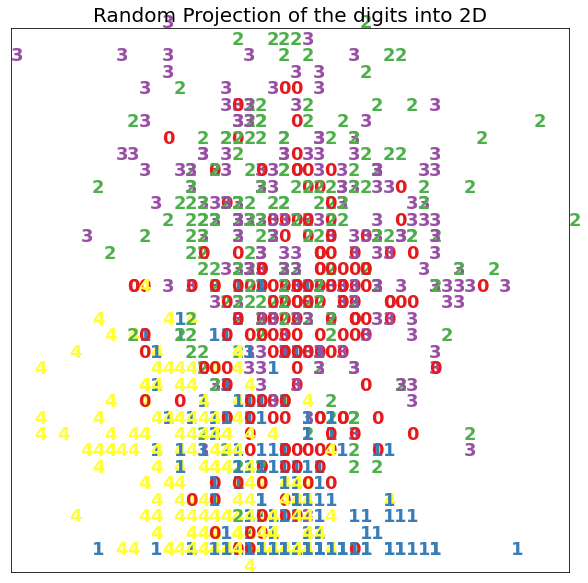

In [7]:
# Random 2D projection using a random unitary matrix
random_proj = random_projection.SparseRandomProjection(n_components=2, random_state=42)
data_randproj = random_proj.fit_transform(digits.data)
plot_comp(data_randproj,digits.target, "Random Projection of the digits into 2D")

plt.savefig('C:/Users/riven/iCloudDrive/midproject/img/RandomDigits.png', bbox_inches='tight')

In [8]:
# Isomap 
pathMethod = ["FW", "D"]
isomap_dig = [Isomap(n_components=2, n_neighbors=10, path_method=p).fit_transform(digits.data) for p in pathMethod]

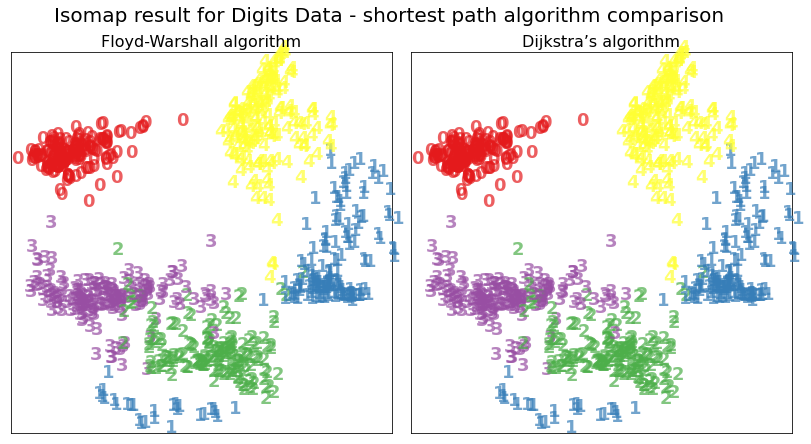

In [9]:
pathMethod_name = ["Floyd-Warshall algorithm", "Dijkstra’s algorithm"]
fig, axes = plt.subplots(1, 2, figsize=(14, 7),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.05, wspace=0.05))

fig.suptitle("Isomap result for Digits Data - shortest path algorithm comparison", y= 0.97, size=20)
for i, ax in enumerate(axes.flat):
    data = isomap_dig[i]
    data = MinMaxScaler().fit_transform(data)
    
    for j in range(data.shape[0]):
        ax.text(data[j, 0], data[j, 1], str(digits.target[j]),
                color=plt.cm.Set1(digits.target[j] / 7),
                fontdict={'weight': 'bold', 'size': 18},alpha=0.7)
    
    ax.set_title("{0}".format(pathMethod_name[i]), size=16)
    
plt.savefig('C:/Users/riven/iCloudDrive/midproject/img/isomap_algo_digits.png', bbox_inches='tight')

In [10]:
# Isomap 
neighborsMethod = ['brute', 'kd_tree', 'ball_tree']
isomap_dig = [Isomap(n_components=2, n_neighbors=10,neighbors_algorithm=k).fit_transform(digits.data) for k in neighborsMethod]

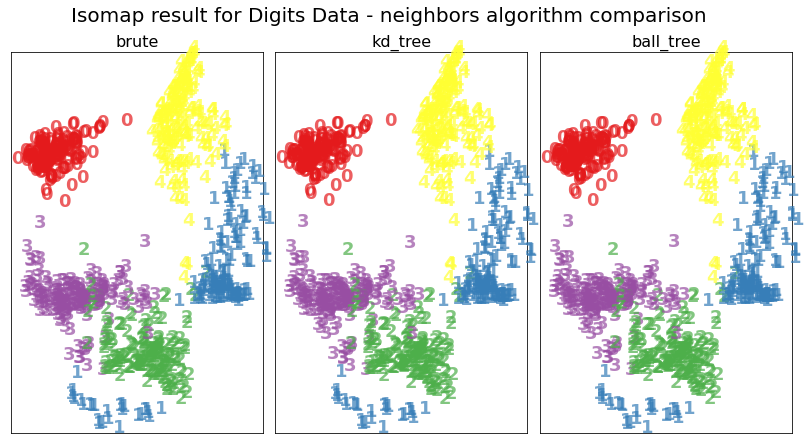

In [11]:
neighborsMethod_name = ['brute', 'kd_tree', 'ball_tree']
fig, axes = plt.subplots(1, 3, figsize=(14, 7),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.05, wspace=0.05))

fig.suptitle("Isomap result for Digits Data - neighbors algorithm comparison", y= 0.97, size=20)
for i, ax in enumerate(axes.flat):
    data = isomap_dig[i]
    data = MinMaxScaler().fit_transform(data)
    
    for j in range(data.shape[0]):
        ax.text(data[j, 0], data[j, 1], str(digits.target[j]),
                color=plt.cm.Set1(digits.target[j] / 7),
                fontdict={'weight': 'bold', 'size': 18},alpha=0.7)
    
    ax.set_title("{0}".format(neighborsMethod_name[i]), size=16)
    
plt.savefig('C:/Users/riven/iCloudDrive/midproject/img/isomap_algo_digits.png', bbox_inches='tight')

In [12]:
k_param = [k for k in range(5, 25, 5)]
isomap_dig = [Isomap(n_components=2, n_neighbors=k).fit_transform(digits.data) for k in k_param]

C:\Users\riven\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_isomap.py:324: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
C:\Users\riven\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


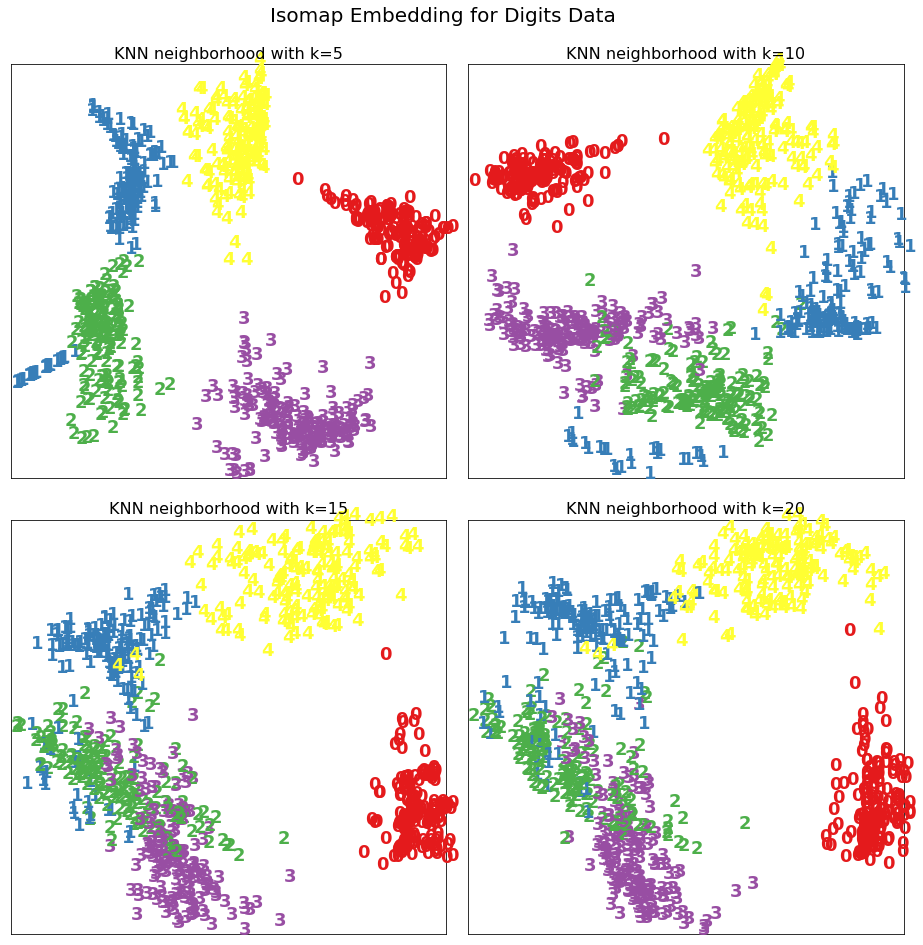

In [13]:
fig, axes = plt.subplots(2, 2, figsize=(16, 16),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.05))

fig.suptitle("Isomap Embedding for Digits Data", y= 0.93, size=20)
for i, ax in enumerate(axes.flat):
    data = isomap_dig[i]
    data = MinMaxScaler().fit_transform(data)
    
    for j in range(data.shape[0]):
        ax.text(data[j, 0], data[j, 1], str(digits.target[j]),
                color=plt.cm.Set1(digits.target[j] / 7),
                fontdict={'weight': 'bold', 'size': 18})
    
    ax.set_title("KNN neighborhood with k={0}".format(k_param[i]), size=16)
    
plt.savefig('C:/Users/riven/iCloudDrive/midproject/img/isomap_k_digits.png', bbox_inches='tight')

In [14]:
mds = MDS(n_components=2).fit_transform(digits.data)
pca = PCA(n_components=2).fit_transform(digits.data)
isomap = Isomap(n_components=2, n_neighbors=10).fit_transform(digits.data)

In [ ]:
result = [pca, mds, isomap]
Method_name = ["PCA", "MDS", "Isomap"]
fig, axes = plt.subplots(1, 3, figsize=(18, 6),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.05, wspace=0.05))

fig.suptitle("Digits Data - dimension reduction method comparison", y= 0.97, size=20)
for i, ax in enumerate(axes.flat):
    data = result[i]
    data = MinMaxScaler().fit_transform(data)
    
    for j in range(data.shape[0]):
        ax.text(data[j, 0], data[j, 1], str(digits.target[j]),
                color=plt.cm.Set1(digits.target[j] / 7),
                fontdict={'weight': 'bold', 'size': 18})
    
    ax.set_title("{0}".format(Method_name[i]), size=16)
    
plt.savefig('C:/Users/riven/iCloudDrive/midproject/img/isomap_comp_digits.png', bbox_inches='tight')